In [1]:
import numpy as np
import matplotlib.pyplot as plt
from constants import *
from supernovaNuBoostedDM import get_tvan_thetaM

In [121]:
from scipy.optimize import root_scalar

In [2]:
def annihilationCrossSectionDM2VV(mx,mV,gD):
    """
    Calculate the DM annihilation cross section to 2V, in terms of mV < mx
    and non-relativistic DM
    
    Input
    ------
    mx: DM mass, MeV
    mV: Mediator mass, MeV
    gD: DM-DM coupling constant
    
    Output
    ------
    scalar: annhilation cross section, cm^3 s^-1
    """
    if mV < mx:
        # Dark fine structure constant
        alphaX = gD**2/4/np.pi
        anncrox = 8*np.pi*alphaX**2*np.sqrt(1 - mV**2/mx**2)*(mx**2 - mV**2)/(mV**2 - 2*mx**2)**2
        return anncrox*to_cm2*lightSpeed
    raise ValueError('The cross section is for light mediator case, thus, mV should be smaller than mx')


def canonicalConstraint_gD(mx,mV,canonical_val = 3e-26):
    """
    Get the resulted gD to produce the thermal relic cross section for light
    mediator case
    
    Input
    ------
    mx: DM mass, MeV
    mV: Mediator mass, MeV
    canonical_val: Thermal relic cross section, default 3e-26 cm^3 s^-1
    
    Output
    ------
    scalar: The resulted gD, dimensionless
    """
    gD_4 = canonical_val/annihilationCrossSectionDM2VV(mx,mV,1)
    return gD_4**0.25


def canonicalConstraint_mV(mx,gD,canonical_val = 3e-26):
    """
    Get the resulted mV to produce the thermal relic cross section for light
    mediator case
    
    Input
    ------
    mx: DM mass, MeV
    gD: The DM-DM coupling constant
    canonical_val: Thermal relic cross section, default 3e-26 cm^3 s^-1
    
    Output
    ------
    scalar: The resulted mV, MeV
    """
    # Converted to natural unit
    sigv = canonical_val/lightSpeed/to_cm2
    # Dark fine structure constant
    alphaX = gD**2/4/np.pi
    return np.sqrt(-64*np.pi**2*alphaX**4/(mx*sigv)**2 + mx**2)


def sensitivity(b,cl=2):
    """
    Get the require event to obtain given confidence level for background b
    
    Input
    ------
    b: Background event
    cl: Confidence level, default 2
    
    Output
    ------
    scalar: The required event rate s
    """
    return cl*(cl + np.sqrt(4*b + cl**2))/2

In [ ]:
"""
mx_list = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
Tx_list = [5,10,20,40]
Rs_list = [3,8.35,8.5,8.65,14]
beta_list = [0,0.25,0.5,1]
"""

In [9]:
#pathToFlux = '/Users/yenhsun/flux'
#pathToEventLightMv = '/Users/yenhsun/SNnuBDM_data/eventLightMediator'
#pathToEventEqualMv = '/Users/yenhsun/SNnuBDM_data/eventEqualMediator'
#flux_mx1.00e-01_Tx005_Rs3.00_beta0.00
pathToFlux =  '/Volumes/GoogleDrive/其他電腦/我的 iMac/SNnuBDM_data/flux'
pathToEventLightMv = '/Volumes/GoogleDrive/其他電腦/我的 iMac/SNnuBDM_data/eventLightMediator'
pathToEventEqualMv = '/Volumes/GoogleDrive/其他電腦/我的 iMac/SNnuBDM_data/eventEqualMediator'

In [7]:
mx = 1e-2
Tx = 10
Rstar = [8.35,8.5,8.65]
beta = 0
flux_Rstar = []
for i in range(3):
    
    flux = np.loadtxt(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx:0{3}d}_Rs{Rstar[i]:.2f}_beta{beta:.2f}.txt',skiprows=1)
    #flux = np.loadtxt(pathToFlux + '/flux_mx1.00e-01_Tx005_Rs3.00_beta0.00.txt',skiprows=1)
    #print(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx:0{3}d}_Rs{Rstar[i]:.2f}_beta{beta:.2f}.txt')
    flux_Rstar.append(flux)
flux_Rstar = np.array(flux_Rstar)

(5e-17, 3e-09)

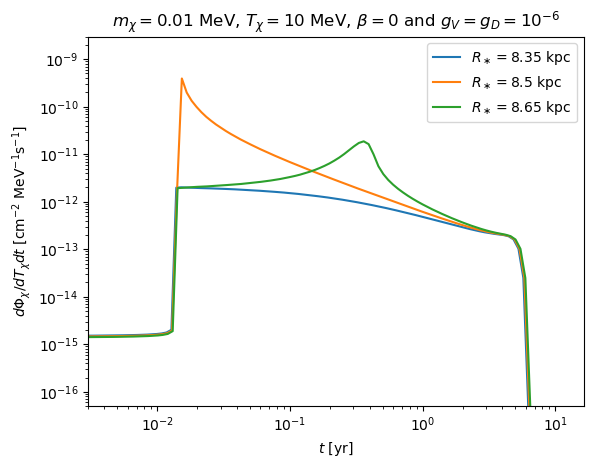

In [8]:
for i in range(3):
    plt.plot(flux_Rstar[i,:,0]/yr2s,flux_Rstar[i,:,1],label=r'$R_\ast = $'+str(Rstar[i])+' kpc')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$ [yr]')
plt.ylabel(r'$d\Phi_\chi/dT_\chi dt$ [cm$^{-2}$ MeV$^{-1} $s$^{-1}$]')
plt.title(r'$m_\chi=$' + str(mx) + r' MeV, $T_\chi=$' + str(Tx) + r' MeV, $\beta=0~{\rm and}~g_V=g_D=10^{-6}$')
plt.legend()
plt.xlim(3e-3,)
plt.ylim(5e-17,3e-9)
#plt.savefig('flux_v_Rs.pdf',bbox_inches='tight')

In [50]:
#mx = 1e-2
#Tx = 10
Rstar = 8.5
beta = [0,0.5,1]
flux_beta = []
for i in range(3):
    flux = np.loadtxt(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx:0{3}d}_Rs{Rstar:.2f}_beta{beta[i]:.2f}.txt',skiprows=1)
    #flux = np.loadtxt(pathToFlux + '/flux_mx1.00e-01_Tx005_Rs3.00_beta0.00.txt',skiprows=1)
    #print(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx:0{3}d}_Rs{Rstar[i]:.2f}_beta{beta:.2f}.txt')
    flux_beta.append(flux)
flux_beta = np.array(flux_beta)

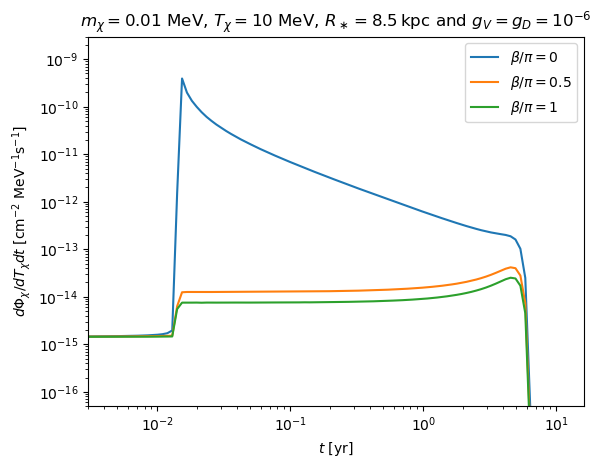

In [52]:
for i in range(3):
    plt.plot(flux_beta[i,:,0]/yr2s,flux_beta[i,:,1],label=r'$\beta/\pi = $'+str(beta[i]))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$ [yr]')
plt.ylabel(r'$d\Phi_\chi/dT_\chi dt$ [cm$^{-2}$ MeV$^{-1} $s$^{-1}$]')
plt.title(r'$m_\chi=$' + str(mx) + r' MeV, $T_\chi=$' + str(Tx) + r' MeV, $R_\ast=8.5\,{\rm kpc~and}~g_V=g_D=10^{-6}$')
plt.legend()
plt.xlim(3e-3,)
plt.ylim(5e-17,3e-9)
#plt.savefig('flux_v_beta.pdf',bbox_inches='tight')

In [10]:
# Physical properties
NeSK = 7.473e33 # SK total electron number
gV = 1
gD = 1
eps = 1
totalEffect = NeSK*gV**2*gD**4*eps**2 # Effects from coupling constants and detector electron number
# Load event
Rstar = 8.5
beta = [0,0.5,1]
eventLight_beta = []
eventEqual_beta = []
for i in range(len(beta)):    
    eventLight = np.loadtxt(pathToEventLightMv + f'/eventPerElectron_Rs{Rstar:.2f}_beta{beta[i]:.2f}.txt',skiprows=1)
    eventEqual = np.loadtxt(pathToEventEqualMv + f'/eventPerElectron_Rs{Rstar:.2f}_beta{beta[i]:.2f}.txt',skiprows=1)
    # event number times the total effect
    eventLight[:,1] = eventLight[:,1]*totalEffect 
    eventEqual[:,1] = eventEqual[:,1]*totalEffect 
    eventLight_beta.append(eventLight)
    eventEqual_beta.append(eventEqual)
eventLight_beta = np.array(eventLight_beta)
eventEqual_beta = np.array(eventEqual_beta)

In [11]:
# Background
texpMax = 35*yr2s # maximum exposure time
obsSK =  526.314 # observed in SK per year, whole sky
backgroundSK = []
# Get the list for DM mass
mx_list = eventLight_beta[0,:,0]
for mx in mx_list:
    # the associated tvan
    tvan,_ = get_tvan_thetaM(5,mx,Rstar)
    if tvan <= texpMax:
        texp = tvan
    else:
        texp = texpMax
    bkgSK = obsSK*(texp - 10)/yr2s
    backgroundSK.append(bkgSK)
backgroundSK = np.array(backgroundSK)

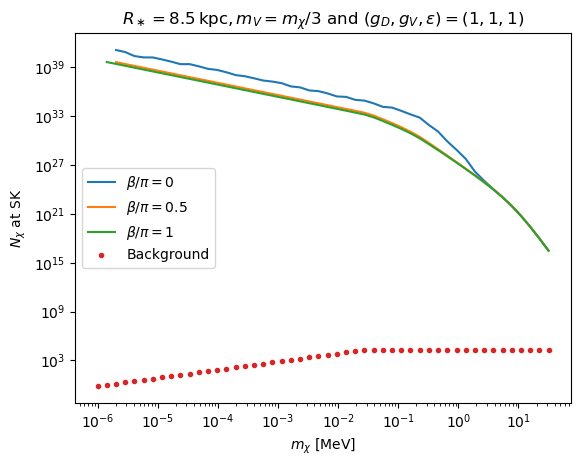

In [12]:
for i in range(3):
    plt.plot(eventLight_beta[i,:,0],eventLight_beta[i,:,1],label=r'$\beta/\pi = $'+str(beta[i]))
plt.plot(mx_list,backgroundSK,'.',label='Background')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$m_\chi$ [MeV]')
plt.ylabel(r'$N_\chi$ at SK')
plt.title(r'$R_\ast=8.5\,{\rm kpc},m_V=m_\chi/3~{\rm and}~(g_D,g_V,\epsilon)=(1,1,1)$')
plt.legend()
#plt.savefig('eventSK.pdf',bbox_inches='tight')
#plt.xlim(3e-3,)
#plt.ylim(5e-17,3e-9)

In [13]:
# Load constraints
SN_equal = 10**np.loadtxt('../data/constraints/SN1987_eps1.txt',delimiter=',') # SN equal eps and gz
CCFR_equal = 10**np.loadtxt('../data/constraints/CCFR_eps1.txt',delimiter=',') # CCFR equal eps and gz
Borexino_equal = 10**np.loadtxt('../data/constraints/Borexino_eps1.txt',delimiter=',') # Borexino equal eps and gz
StarCool_equal = 10**np.loadtxt('../data/constraints/StellarCooling_eps1.txt',delimiter=',') # Stellar cooling equal eps and gz
gm2_equal = 10**np.loadtxt('../data/constraints/g-2_eps1.txt',delimiter=',') # g-2 equal eps and gz

In [14]:
# gD constraint from thermal relic
gD_canonical = []
for mx in mx_list:
    mV = mx/3
    gD_canonical.append(canonicalConstraint_gD(mx,mV))

In [36]:
# Constraint gV
gV_LightMv_constraint_beta = []
gV_EqualMv_constraint_beta = []
for beta_num in range(len(beta)):
    gV_LightMv_constraint = []
    gV_EqualMv_constraint = []
    for i in range(len(mx_list)):
        # background
        b = backgroundSK[i]
        # required s
        s = sensitivity(b)
        # constraint on gV, assuming gV = eps
        gV_Light_required = (s/gD_canonical[i]**4/eventLight_beta[:,:,1][beta_num,i])**0.25
        gV_Equal_required = (s/eventEqual_beta[:,:,1][beta_num,i])**0.25
        gV_LightMv_constraint.append(gV_Light_required)
        gV_EqualMv_constraint.append(gV_Equal_required)
    gV_LightMv_constraint_beta.append(gV_LightMv_constraint)
    gV_EqualMv_constraint_beta.append(gV_EqualMv_constraint)
gV_LightMv_constraint_beta = np.array(gV_LightMv_constraint_beta)
gV_EqualMv_constraint_beta = np.array(gV_EqualMv_constraint_beta)

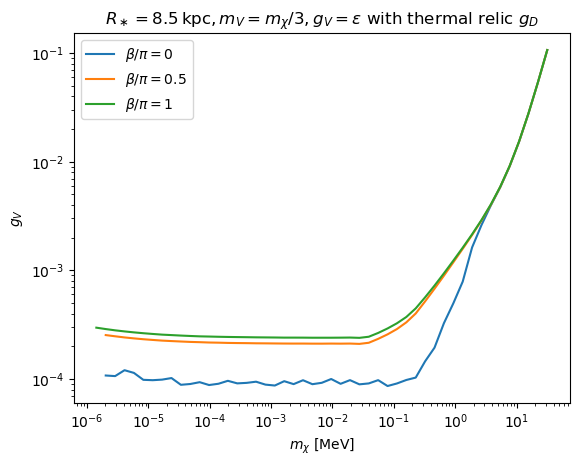

In [28]:
for i in range(3):
    plt.plot(eventLight_beta[i,:,0],gV_LightMv_constraint_beta[i],label=r'$\beta/\pi = $'+str(beta[i]))
#plt.plot(mx_list,backgroundSK,'.',label='Background')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$m_\chi$ [MeV]')
plt.ylabel(r'$g_V$')
plt.title(r'$R_\ast=8.5\,{\rm kpc},m_V=m_\chi/3,g_V=\epsilon$ with thermal relic $g_D$')
plt.legend()
#plt.savefig('eventSK.pdf',bbox_inches='tight')
#plt.xlim(3e-3,)
#plt.ylim(5e-17,3e-9)

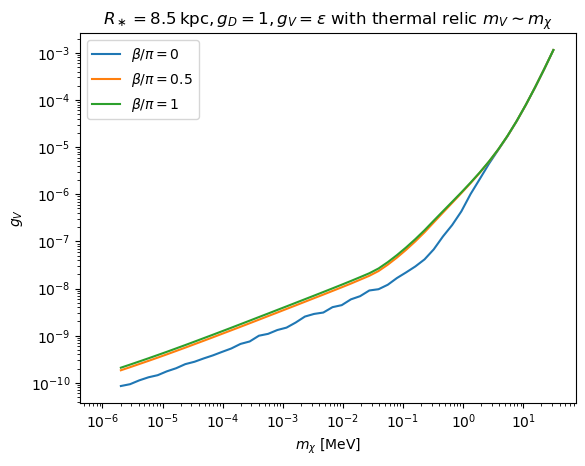

In [38]:
for i in range(3):
    plt.plot(eventEqual_beta[i,:,0],gV_EqualMv_constraint_beta[i],label=r'$\beta/\pi = $'+str(beta[i]))
#plt.plot(mx_list,backgroundSK,'.',label='Background')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$m_\chi$ [MeV]')
plt.ylabel(r'$g_V$')
plt.title(r'$R_\ast=8.5\,{\rm kpc},g_D = 1, g_V=\epsilon$ with thermal relic $m_V\sim m_\chi$')
plt.legend()

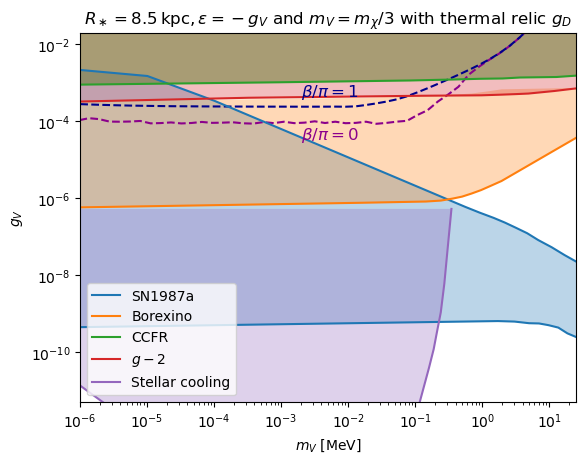

In [40]:
color = ['darkmagenta','','darkblue']
for i in [0,2]:
    plt.plot(eventLight_beta[i,:,0]/3,gV_LightMv_constraint_beta[i],'--',color=color[i])
    plt.text(2e-3, (6*i+1)*3.3e-5, r'$\beta/\pi=$'+str(beta[i]), color=color[i],fontsize=12)
#plt.plot(mx_list,backgroundSK,'.',label='Background')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$g_V$')
plt.plot(SN_equal.T[0],SN_equal.T[1],label='SN1987a')
plt.fill_between(SN_equal.T[0],SN_equal.T[1],1e-10,alpha=0.3)
# Borexino
plt.plot(Borexino_equal.T[0],Borexino_equal.T[1],label='Borexino')
plt.fill_between(Borexino_equal.T[0],Borexino_equal.T[1],gm2_equal.T[1][:11],alpha=0.3)
# CCFR
plt.plot(CCFR_equal.T[0],CCFR_equal.T[1],label='CCFR')
plt.fill_between(CCFR_equal.T[0],CCFR_equal.T[1], 1,alpha=0.5)
# g-2
plt.plot(gm2_equal.T[0],gm2_equal.T[1],label='$g-2$')
plt.fill_between(gm2_equal.T[0],gm2_equal.T[1],1,alpha=0.3)
# Stellar
plt.plot(StarCool_equal.T[0],StarCool_equal.T[1],label='Stellar cooling')
plt.fill_between(StarCool_equal.T[0],StarCool_equal.T[1], StarCool_equal.T[1][-1],alpha=0.3)
# SIDM
#plt.plot([5.17,5.17],[5e-12,2e-2],'-.',color='darkslategrey')
#plt.text(2.5, 3e-11, 'SIDM excl. $m_V< 5$ MeV', color='darkslategrey',fontsize=12,rotation=90)
plt.xlim(1e-6,25)
plt.ylim(5e-12,2e-2)
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_V$ [MeV]')
plt.ylabel(r'$g_V$')
plt.title(r'$R_\ast=8.5\,{\rm kpc},\varepsilon=-g_V$ and $m_V=m_\chi/3$ with thermal relic $g_D$')
#plt.savefig('sensitivity_thermal_gD.pdf',bbox_inches = 'tight')

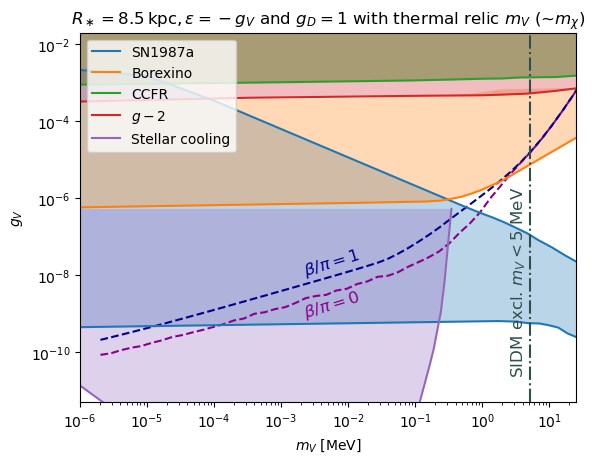

In [58]:
color = ['darkmagenta','','darkblue']
for i in [0,2]:
    plt.plot(eventEqual_beta[i,:,0],gV_EqualMv_constraint_beta[i],'--',color=color[i])
    plt.text(2e-3, (6*i+1)*7.8e-10, r'$\beta/\pi=$'+str(beta[i]), color=color[i],fontsize=12,rotation=17)
#plt.plot(mx_list,backgroundSK,'.',label='Background')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$g_V$')
plt.plot(SN_equal.T[0],SN_equal.T[1],label='SN1987a')
plt.fill_between(SN_equal.T[0],SN_equal.T[1],1e-10,alpha=0.3)
# Borexino
plt.plot(Borexino_equal.T[0],Borexino_equal.T[1],label='Borexino')
plt.fill_between(Borexino_equal.T[0],Borexino_equal.T[1],gm2_equal.T[1][:11],alpha=0.3)
# CCFR
plt.plot(CCFR_equal.T[0],CCFR_equal.T[1],label='CCFR')
plt.fill_between(CCFR_equal.T[0],CCFR_equal.T[1], 1,alpha=0.5)
# g-2
plt.plot(gm2_equal.T[0],gm2_equal.T[1],label='$g-2$')
plt.fill_between(gm2_equal.T[0],gm2_equal.T[1],1,alpha=0.3)
# Stellar
plt.plot(StarCool_equal.T[0],StarCool_equal.T[1],label='Stellar cooling')
plt.fill_between(StarCool_equal.T[0],StarCool_equal.T[1], StarCool_equal.T[1][-1],alpha=0.3)
# SIDM
plt.plot([5.17,5.17],[5e-12,2e-2],'-.',color='darkslategrey')
plt.text(2.5, 3e-11, 'SIDM excl. $m_V< 5$ MeV', color='darkslategrey',fontsize=12,rotation=90)
plt.xlim(1e-6,25)
plt.ylim(5e-12,2e-2)
plt.legend(loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_V$ [MeV]')
plt.ylabel(r'$g_V$')
plt.title(r'$R_\ast=8.5\,{\rm kpc},\varepsilon=-g_V$ and $g_D=1$ with thermal relic $m_V$ (~$m_\chi$)')
plt.savefig('sensitivity_thermal_mV.pdf',bbox_inches = 'tight')